In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook

import sys

sys.path.append("incl/")

import ELPH_dyn
import ELPH_utils

import narrom


#global hyperparameters
kmax = 4.
n_kmax = 80

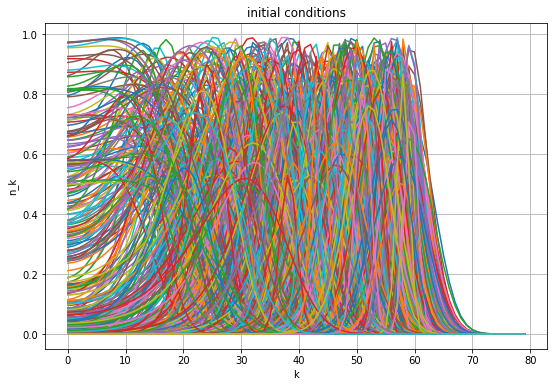

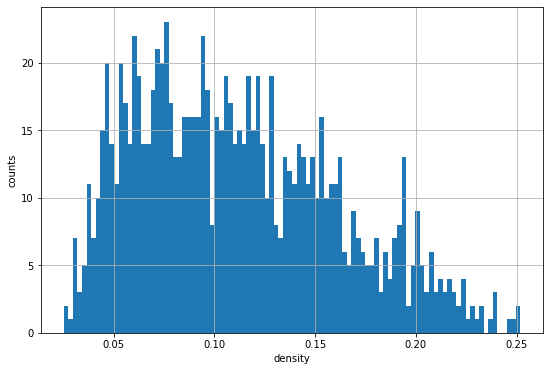

In [2]:
n_runs = 1000

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.0, high=0.7, size=n_runs)
paras[:,1] = rng.uniform(low=0.02, high=0.1, size=n_runs)
paras[:,2] = 0.1

inits = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = ELPH_dyn.get_density_from_state(inits[r][:n_kmax], kmax/n_kmax)

    
plt.grid()
for r in range(n_runs):
    plt.plot(inits[r][:n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [3]:
runs = ELPH_utils.get_runs(kmax, n_kmax, inits, tmax=2000, n_tmax=400)

run  1  from  1000
run  2  from  1000
run  3  from  1000
run  4  from  1000


KeyboardInterrupt: 

In [6]:
ELPH_utils.save_runs(runs, filename='../runs_n_kmax=130')

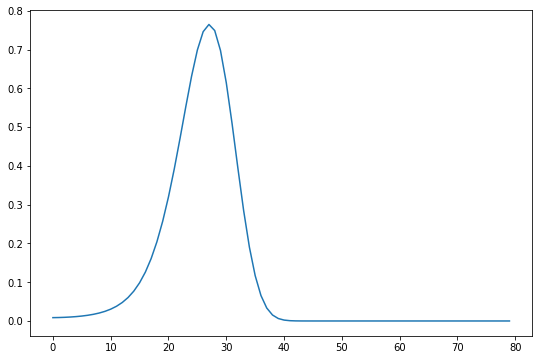

In [21]:
init = ELPH_dyn.get_init_cond_gauss(kmax = kmax, n_kmax = n_kmax, max_pos = 0.15, width = 0.05, density=0.1)
plt.plot(init[:n_kmax])
plt.show()

In [1]:
nkdyn_el = ELPH_dyn.get_el_dynamics(init, kmax=kmax, n_kmax = n_kmax)

narrom.utils.plot_trajectory(nkdyn_el.T)

NameError: name 'ELPH_dyn' is not defined